# Principal Component Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

%matplotlib inline

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [ ]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [ ]:
# loading dataset into Pandas DataFrame
df_iris = pd.read_csv(iris_url, names=['sepal length','sepal width','petal length','petal width','target'])

In [ ]:
df_iris.head(15)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


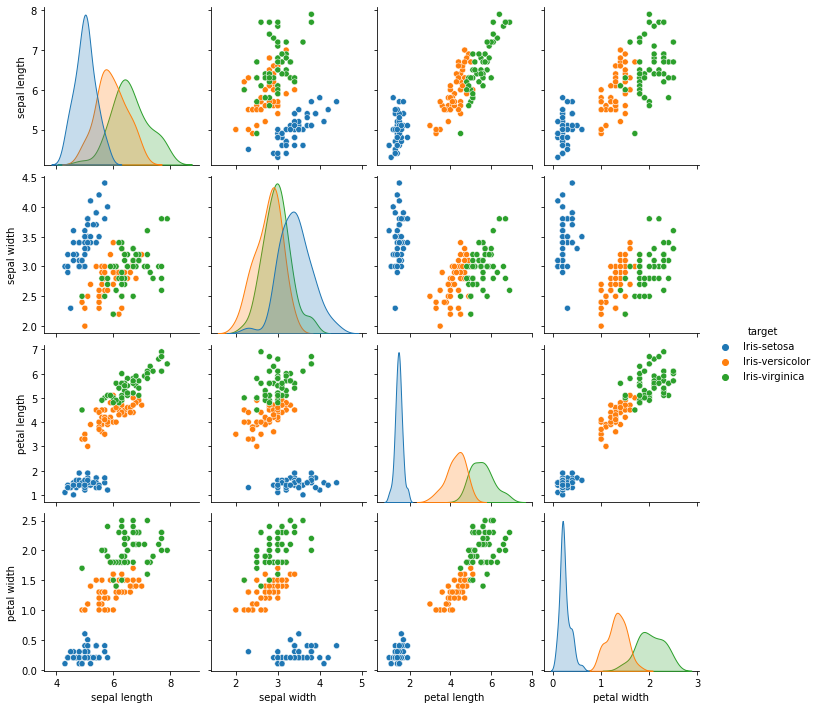

In [ ]:
sns.pairplot(df_iris, hue='target')

You can immediately see that the features petal length and petal width are strongly correlated


### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.


In [ ]:
features_iris = ['sepal length', 'sepal width', 'petal length', 'petal width']
x_iris = df_iris.loc[:, features_iris].values

In [ ]:
y_iris = df_iris.loc[:, ['target']].values

In [ ]:
x_iris = StandardScaler().fit_transform(x_iris)

In [ ]:
df_iris_standarize = pd.DataFrame(data = x_iris, columns = features_iris)
df_iris_standarize['target'] = df_iris['target']
df_iris_standarize.head(15)

,sepal length,sepal width,petal length,petal width,target
0,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa
5,-0.537178,1.957669,-1.170675,-1.050031,Iris-setosa
6,-1.506521,0.800654,-1.341272,-1.181504,Iris-setosa
7,-1.021849,0.800654,-1.284407,-1.312977,Iris-setosa
8,-1.748856,-0.356361,-1.341272,-1.312977,Iris-setosa
9,-1.143017,0.106445,-1.284407,-1.444450,Iris-setosa


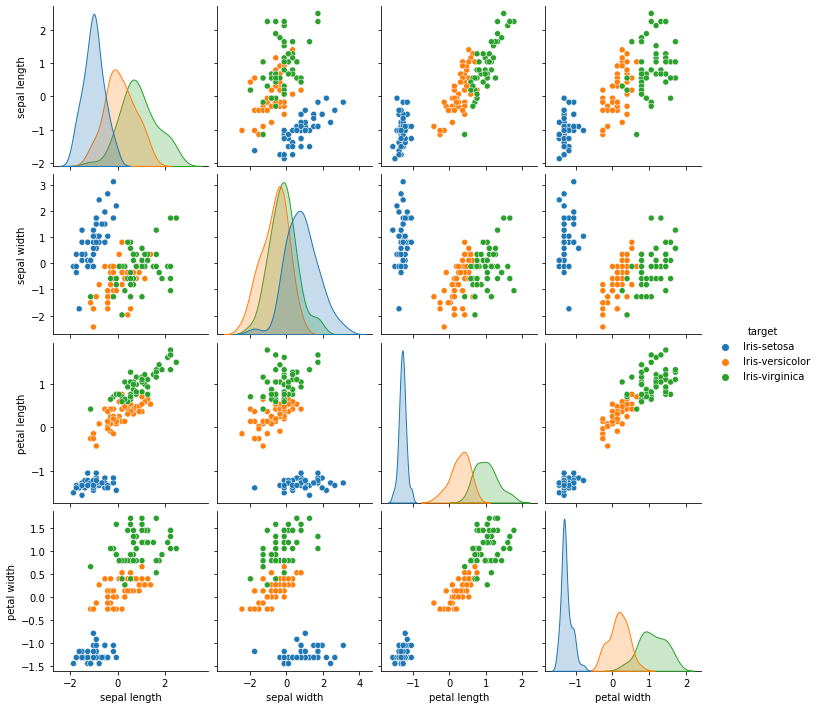

In [ ]:
sns.pairplot(df_iris_standarize, hue='target')

We can see that the distributions are now standardized

### PCA Projection to 2D

In [ ]:
pca_iris = PCA(n_components=2)

In [ ]:
principalComponents_iris = pca_iris.fit_transform(x_iris)

In [ ]:
principalDf_iris = pd.DataFrame(data = principalComponents_iris ,columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf_iris = pd.concat([principalDf_iris, df_iris[['target']]], axis = 1)
finalDf_iris.head(15)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa



### Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes.

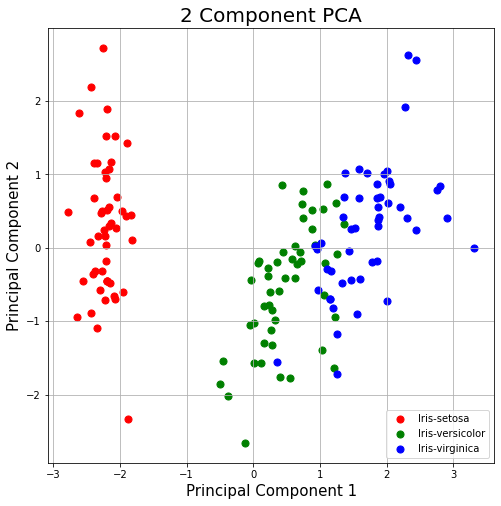

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


iris_targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(iris_targets,colors):
    indicesToKeep = finalDf_iris['target'] == target
    ax.scatter(finalDf_iris.loc[indicesToKeep, 'principal component 1']
               , finalDf_iris.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(iris_targets)
ax.grid()

iris-setosa is linearry separablo from others class

### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca_iris.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer = load_breast_cancer()
print(f"Breast cancer dataset type: {type(breast_cancer)}")

Breast cancer dataset type: <class 'sklearn.utils.Bunch'>


In [ ]:
dir(breast_cancer)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

The loaded breast cancer utils from sklearn is a type of sklearn.utils.Bunch. Some of its attributes e.g. data, feature_names and target can be used in order to switch to pandas.DataFrame.

In [ ]:
# sklearn.utils.Bunch -> pandas.DataFrame
df_bc = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df_bc['target'] = breast_cancer.target

df_bc['target'] = df_bc['target'].apply(lambda x: 'benign' if x == 0 else 'malignant')
df_bc.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,benign



* Visualizes correlations between pairs of features (due to the greater number of features use pandas corr () function instead of pairplot instead of seaborn heatmap ())

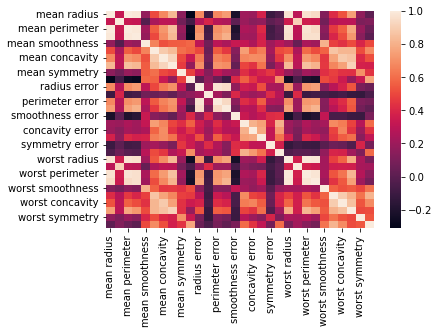

In [ ]:
dataplot = sns.heatmap(df_bc.corr())

Such representation of correlation between features, can help understand the idea and need of dimensionality reduction. <br>
If two features are correlated in more than 95%, (for example mean radius with mean perimeter) thay can be mixed into one feature - they is no point to keep them both, as the single "mixture" can explain them with very high accuracy.

* Perform PCA and visualize the data

In [ ]:
# pandas.core.indexes.base.Index -> List
features_breast_cancer = df_bc.columns.tolist()
features_breast_cancer = features_breast_cancer[:-1] # Skip target

In [ ]:
x_breast_cancer = df_bc.loc[:, features_breast_cancer].values
y_breast_cancer = df_bc.loc[:, ['target']].values

In [ ]:
# Standarization
print(type(x_breast_cancer))
x_breast_cancer = StandardScaler().fit_transform(x_breast_cancer)

<class 'numpy.ndarray'>


In [ ]:
# Werifization of standarization - standard deviation == 1 and mean == 0.
x_breast_cancer.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
x_breast_cancer.mean(axis=0)

array([-3.16286735e-15, -6.53060890e-15, -7.07889127e-16, -8.79983452e-16,
        6.13217737e-15, -1.12036918e-15, -4.42138027e-16,  9.73249991e-16,
       -1.97167024e-15, -1.45363120e-15, -9.07641468e-16, -8.85349205e-16,
        1.77367396e-15, -8.29155139e-16, -7.54180940e-16, -3.92187747e-16,
        7.91789988e-16, -2.73946068e-16, -3.10823423e-16, -3.36676596e-16,
       -2.33322442e-15,  1.76367415e-15, -1.19802625e-15,  5.04966114e-16,
       -5.21317026e-15, -2.17478837e-15,  6.85645643e-16, -1.41265636e-16,
       -2.28956670e-15,  2.57517109e-15])

In [ ]:
df_bc_standarize = pd.DataFrame(data=x_breast_cancer, columns=features_breast_cancer)
df_bc_standarize['target'] = df_bc['target']

In [ ]:
df_bc_standarize.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,benign
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,benign
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,benign
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,benign
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,benign


In [ ]:
pca_breast_cancer = PCA(n_components=2)

### Perform PCA to reduce dimensionality of breast cancer dataset

In [ ]:
principalComponents_breast_cancer = pca_breast_cancer.fit_transform(x_breast_cancer)

In [ ]:
principalDf_breast_cancer_columns = ['principal component 1', 'principal component 2']
principalDf_breast_cancer = pd.DataFrame(data=principalComponents_breast_cancer, columns=principalDf_breast_cancer_columns)

In [ ]:
finalDf_breast_cancer = pd.concat([principalDf_breast_cancer, df_bc[['target']]], axis=1)
finalDf_breast_cancer.head()

,principal component 1,principal component 2,target
0,9.192837,1.948583,benign
1,2.387802,-3.768172,benign
2,5.733896,-1.075174,benign
3,7.122953,10.275589,benign
4,3.935302,-1.948072,benign


* Examine  explained variance, draw a plot showing relation between total explained variance and number of principal components used


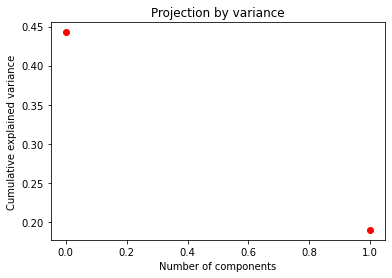

Principal Component 1 explains 44.27202560752636% of total variance.
Principal Component 2 explains 18.97118204403306% of total variance.
Dimensionality reducion from 30 to 2 leaves 63.243207651559416% of total variance.


In [ ]:
variance_ratio = pca_breast_cancer.explained_variance_ratio_

plt.title("Projection by variance")
plt.plot(variance_ratio, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(f"Principal Component 1 explains {variance_ratio[0] * 100}% of total variance.")
print(f"Principal Component 2 explains {variance_ratio[1] * 100}% of total variance.")
print(f"Dimensionality reducion from {len(df_bc.columns)-1} to {len(variance_ratio)} "
      f"leaves {sum(variance_ratio) * 100}% of total variance.")

Dimensionality reduction from original amount of 30 dimenstions to 2, leaves around 63.2% of total variance. The Principal Component 1 explains the 44.27% of total variance, while the PC2 explains 18.97%. The most varied data is naturally explained by the first principal components. Each subsequent principal component explains less variance than the previous one.

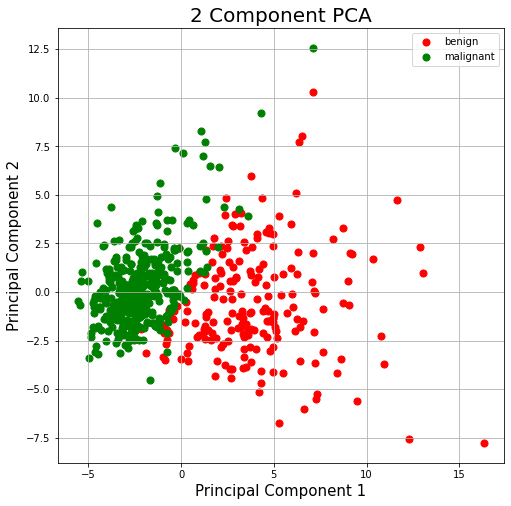

In [ ]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


breast_cancer_targets = ['benign', 'malignant']
colors = ['r', 'g']

for target, color in zip(breast_cancer_targets, colors):
    indicesToKeep = finalDf_breast_cancer['target'] == target

    ax.scatter(finalDf_breast_cancer.loc[indicesToKeep, 'principal component 1'],
               finalDf_breast_cancer.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 50)

ax.legend(breast_cancer_targets)
ax.grid()

* Use recursive feature elimination (available in scikit-learn module) or another feature ranking algorithm to split 30 features to on 15 "more important" and "less important" features. Then repeat the last step from the full data set - draw a plot showing relation between total explained variance and number of principal components used for all 3 cases. Explain the result briefly.

In [ ]:
len(df_bc_standarize.columns)

target_to_binary = lambda y: 0 if y == 'benign' else 1

y_breast_cancer_binary = y_breast_cancer
y_breast_cancer_binary = list(map(target_to_binary, y_breast_cancer_binary))

selector = RFE(estimator = LinearRegression(), n_features_to_select=15)
selector = selector.fit(x_breast_cancer, y_breast_cancer_binary)

In [ ]:
selector.ranking_

array([ 1,  7,  1,  1, 14,  1,  1,  1, 13, 16,  1, 12,  1,  5,  2, 15,  1,
        1, 10,  8,  1,  1,  3,  1,  9, 11,  1,  6,  4,  1])

In [ ]:
more_important = np.array(features_breast_cancer)[selector.support_]
less_important = np.array(features_breast_cancer)[np.logical_not(selector.support_)]


print(f"More important features:\n {more_important} \n")
print(f"Less important features:\n {less_important} \n")

print(f"There is no common feature in both subsets: {np.intersect1d(more_important, less_important)}")

More important features:
 ['mean radius' 'mean perimeter' 'mean area' 'mean compactness'
 'mean concavity' 'mean concave points' 'radius error' 'perimeter error'
 'concavity error' 'concave points error' 'worst radius' 'worst texture'
 'worst area' 'worst concavity' 'worst fractal dimension'] 

Less important features:
 ['mean texture' 'mean smoothness' 'mean symmetry' 'mean fractal dimension'
 'texture error' 'area error' 'smoothness error' 'compactness error'
 'symmetry error' 'fractal dimension error' 'worst perimeter'
 'worst smoothness' 'worst compactness' 'worst concave points'
 'worst symmetry'] 

There is no common feature in both subsets: []


### Perform PCA on breast cancer dataset limited to features from 'more important' group

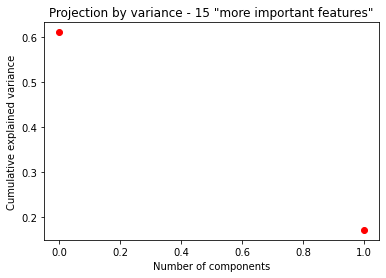

Principal Component 1 explains 61.11158832229878% of total variance.
Principal Component 2 explains 17.106522214184466% of total variance.
Dimensionality reducion from 15 More Important Features to 2 leaves 78.21811053648324% of total variance of shrinked dataset.


In [ ]:
pca_more_important = PCA(n_components=2)

# Limit stanarized dataset only to columns from "more_important" subset
df_bc_more_important = df_bc_standarize[more_important]
x_breast_cancer_more_important = df_bc_more_important.values

principalComponents_breast_cancer_more_important = pca_more_important.fit_transform(x_breast_cancer_more_important)

more_variance_ratio = pca_more_important.explained_variance_ratio_

plt.title("Projection by variance - 15 \"more important features\"")
plt.plot(more_variance_ratio, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(f"Principal Component 1 explains {more_variance_ratio[0] * 100}% of total variance.")
print(f"Principal Component 2 explains {more_variance_ratio[1] * 100}% of total variance.")
print(f"Dimensionality reducion from 15 More Important Features to {len(more_variance_ratio)} "
      f"leaves {sum(more_variance_ratio) * 100}% of total variance of shrinked dataset.")

### Perform PCA on breast cancer dataset limited to features from 'less important' group

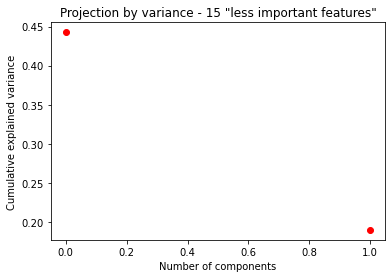

Principal Component 1 explains 35.5194895190406% of total variance.
Principal Component 2 explains 18.553399126553195% of total variance.
Dimensionality reducion from 15 Less Important Features to 2 leaves 54.0728886455938% of total variance of shrinked dataset.


In [ ]:
pca_less_important = PCA(n_components=2)

# Limit stanarized dataset only to columns from "less_important" subset
df_bc_less_important = df_bc_standarize[less_important]
x_breast_cancer_less_important = df_bc_less_important.values

principalComponents_breast_cancer_less_important = pca_less_important.fit_transform(x_breast_cancer_less_important)

less_variance_ratio = pca_less_important.explained_variance_ratio_

plt.title("Projection by variance - 15 \"less important features\"")
plt.plot(variance_ratio, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(f"Principal Component 1 explains {less_variance_ratio[0] * 100}% of total variance.")
print(f"Principal Component 2 explains {less_variance_ratio[1] * 100}% of total variance.")
print(f"Dimensionality reducion from 15 Less Important Features to {len(less_variance_ratio)} "
      f"leaves {sum(less_variance_ratio) * 100}% of total variance of shrinked dataset.")

### Compare 3 cases based on variance ratio

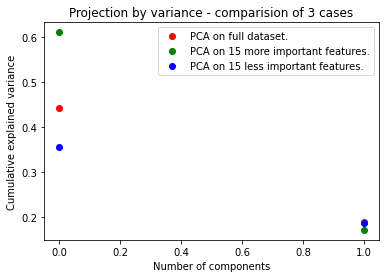

In [ ]:
plt.title("Projection by variance - comparision of 3 cases")
plt.plot(variance_ratio, 'ro', label="PCA on full dataset.")
plt.plot(more_variance_ratio, 'go', label="PCA on 15 more important features.")
plt.plot(less_variance_ratio, 'bo', label="PCA on 15 less important features.")
plt.legend()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Conclusions:
Each sample from breast cancer dataset is described by 30 features, in other words the original dimensionality of breast cancer dataset is equal to 30. When the dataset is linearly separable, PCA can be used as dmiensionality reduction technique e.g. for visualization purposes. <br>

In the first case:
- the dimensionality reduction has been performed on **total amount of features from original dataset**,
- Principal Component 1 explains 44.27% of total variance,
- Principal Component 2 explains 18.97% of total variance,
- Dimensionality reduction based on all 30 features to 2, leaves 63.24% of total variance.

In the second case:
- the dimensionality reduction has been performed on **15 more important feautures**, retrieved by dint of RFE,
- Principal Component 1 explains 66.11% of total variance,
- Principal Component 2 explains 17.10% of total variance,
- Dimensionality reduction based on all 30 features to 2, leaves 78.21% of total variance.

In the third case:
- the dimensionality reduction has been performed on **15 less important feautures**, retrieved by dint of RFE,
- Principal Component 1 explains 35.51% of total variance,
- Principal Component 2 explains 18.55% of total variance,
- Dimensionality reduction based on all 30 features to 2, leaves 54.07% of total variance.

<p style='text-align: justify;'>
Using Recursive Feature Elimination, the group of 30 features has been intentionlly divided into two equal sets. The set of "more important" ones, has accumulated features that better describe the variability of the data. On the other hand, those of the "less important" set, have a lower impact on the data transformation process, and are less likely to significantly impact variance. Therefore, the application of PCA on a dataset limited to 15 "more important" features yielded the best results in terms of how much variance of the original dataset is explained by obtained two principal components. This is due to the fact that a preliminary feature review was done and the PCA was to reduce multidimensionality from the 15 dimensions that are key to the original set. It is natural that the least variance is explained by principal components obtained after applying PCA on a set of less important features. Finally, the result of a PCA running on a full set of features lies in between these two cases. PCA tries to match the new axes to better describe the data that includes all the features - even those that may make a marginal contribution. RFE, preceded by the feature correlation heatmap analysis phase, can significantly increase the quality of data dimensionality reduction, as PCA will be able to operate on a limited set of features and therfore choose new axes considering only the most important dimensions.
</p>

## Kernel PCA

PCA is a linear method. That is it can only be applied to datasets which are linearly separable. It does an excellent job for datasets, which are linearly separable. But, if we use it to non-linear datasets, we might get a result which may not be the optimal dimensionality reduction. Kernel PCA uses a kernel function to project dataset into a higher dimensional feature space, where it is linearly separable. It is similar to the idea of Support Vector Machines.

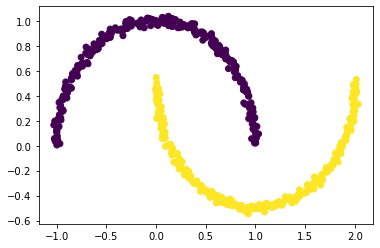

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

Let’s apply PCA on this dataset

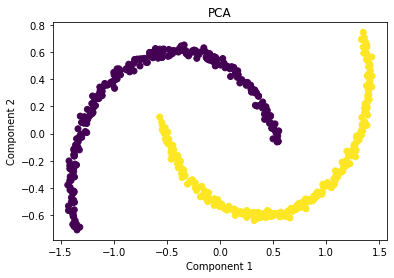

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.title("PCA")
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

PCA failed to distinguish the two classes

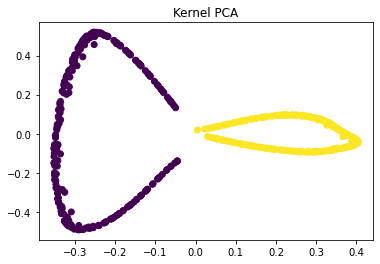

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

Applying kernel PCA on this dataset with RBF kernel with a gamma value of 15

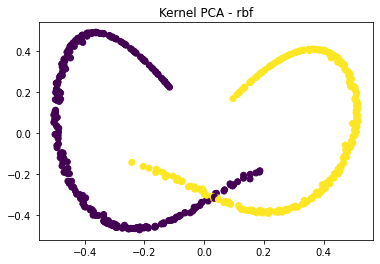

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel ='rbf', gamma = 5)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA - rbf")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

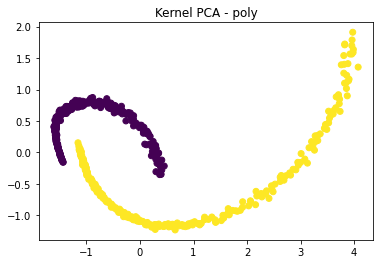

In [ ]:
kpca = KernelPCA(kernel ='poly')
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA - poly")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

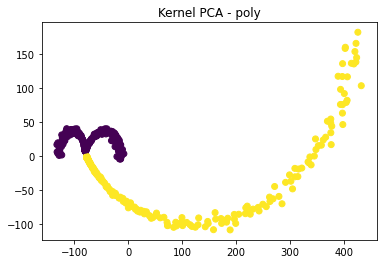

In [ ]:
kpca = KernelPCA(kernel ='poly', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA - poly")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y)
plt.show()

### KernelPCA exercises

* Visualize in 2d datasets used in this labs, experiment with the parameters of the KernelPCA method change kernel and gamma params. Docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

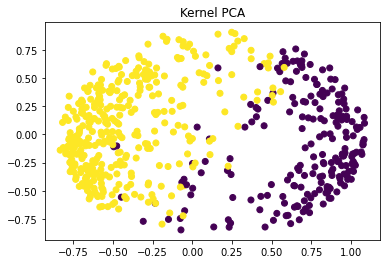

In [ ]:
kpca = KernelPCA(kernel ='cosine')
X_kpca = kpca.fit_transform(x_breast_cancer)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = breast_cancer.target)
plt.show()

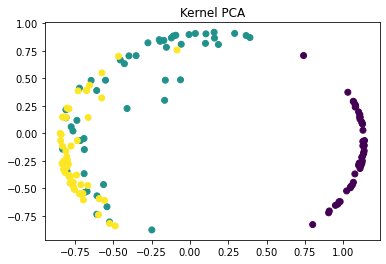

In [ ]:
kpca = KernelPCA(kernel ='cosine')
X_kpca = kpca.fit_transform(x_iris)

iris_target = lambda x : 0 if (x == 'Iris-setosa') else (1 if x == 'Iris-versicolor' else 2)
y_iris = df_iris['target'].apply(iris_target)

plt.title("Kernel PCA")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y_iris)
plt.show()

### Implement files function to arrange 4D matrices into 2D to enable visualizations

In [ ]:
def tiles(examples):
    rows_count = examples.shape[0]
    cols_count = examples.shape[1]
    tile_height = examples.shape[2]
    tile_width = examples.shape[3]

    space_between_tiles = 2
    width = cols_count * (tile_width + space_between_tiles)
    height = rows_count * (tile_height + space_between_tiles)

    img_matrix = np.empty(shape=(height, width))
    img_matrix.fill(np.nan)

    for row_idx in range(rows_count):
        curr_row_pos = row_idx * (tile_width + space_between_tiles)

        for col_idx in range(cols_count):
            curr_col_pos = col_idx * (tile_height + space_between_tiles)

            img_matrix[curr_row_pos:curr_row_pos + tile_width,
                       curr_col_pos:curr_col_pos + tile_height] = examples[row_idx, col_idx]

    return img_matrix

Mnist dataset has: 60000 images.
Image dimensions: 28 x 28
Reduced Mnist dataset has: 288 images.


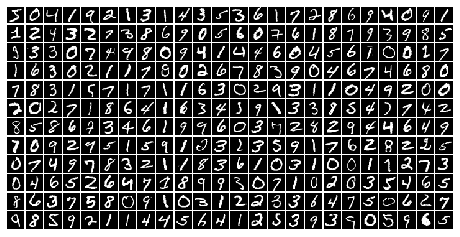

In [ ]:
import mnist

print(f"Mnist dataset has: {mnist.train_images().shape[0]} images.")
print(f"Image dimensions: {mnist.train_images().shape[1]} x {mnist.train_images().shape[2]}")

digits = np.reshape(mnist.train_images()[:12*24], newshape=(12, 24, 28, 28))
print(f"Reduced Mnist dataset has: {mnist.train_images()[:12*24].shape[0]} images.")

img = tiles(digits)

plt.matshow(img, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

In [ ]:
mnist_images = mnist.train_images()
mnist_images = mnist_images.reshape(mnist_images.shape[0], -1)

mnist_images_labels = mnist.train_labels()

print(mnist_images.shape)

(60000, 784)


### Perform PCA to reduce dimensionality

In [ ]:
pca = PCA(n_components=2)
mnist_embedded_pca = pca.fit_transform(mnist_images)

In [ ]:
import inspect

def plot_2d_mnist_scatter(X, y):
    fig, plot = plt.subplots()
    fig.set_size_inches(16, 16)
    plt.prism()

    for i in range(10):
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        plot.scatter(dim0, dim1, label=f"Digit {i}")


    plot.set_xticks(())
    plot.set_yticks(())

    plt.tight_layout()
    plt.legend()
    plt.show()

### Projection of MNIST dataset into two principal components using PCA

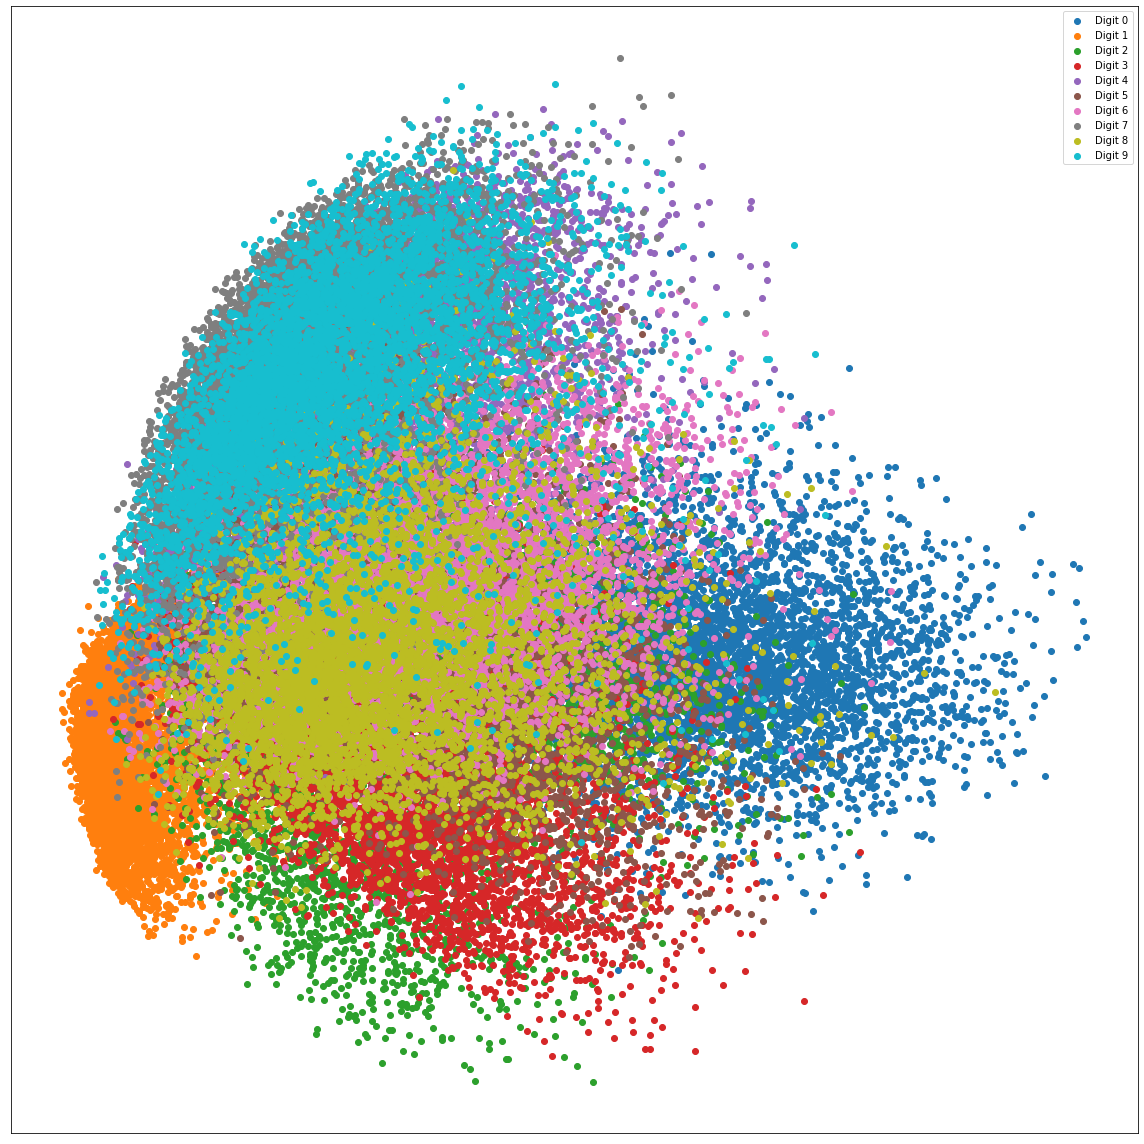

In [ ]:
plot_2d_mnist_scatter(mnist_embedded_pca, mnist_images_labels)

In [ ]:
# Limit samples in dataset to reduce execution time of Kernel PCA
SAMPLES_LIMIT = 10000
mnist_images_small = mnist_images[:SAMPLES_LIMIT]
mnist_images_labels_small = mnist_images_labels[:SAMPLES_LIMIT]


pca_small = PCA(n_components=2)
mnist_small_embedded_pca = pca_small.fit_transform(mnist_images_small)

### Projection of MNIST dataset (limited samples) into two principal components using PCA

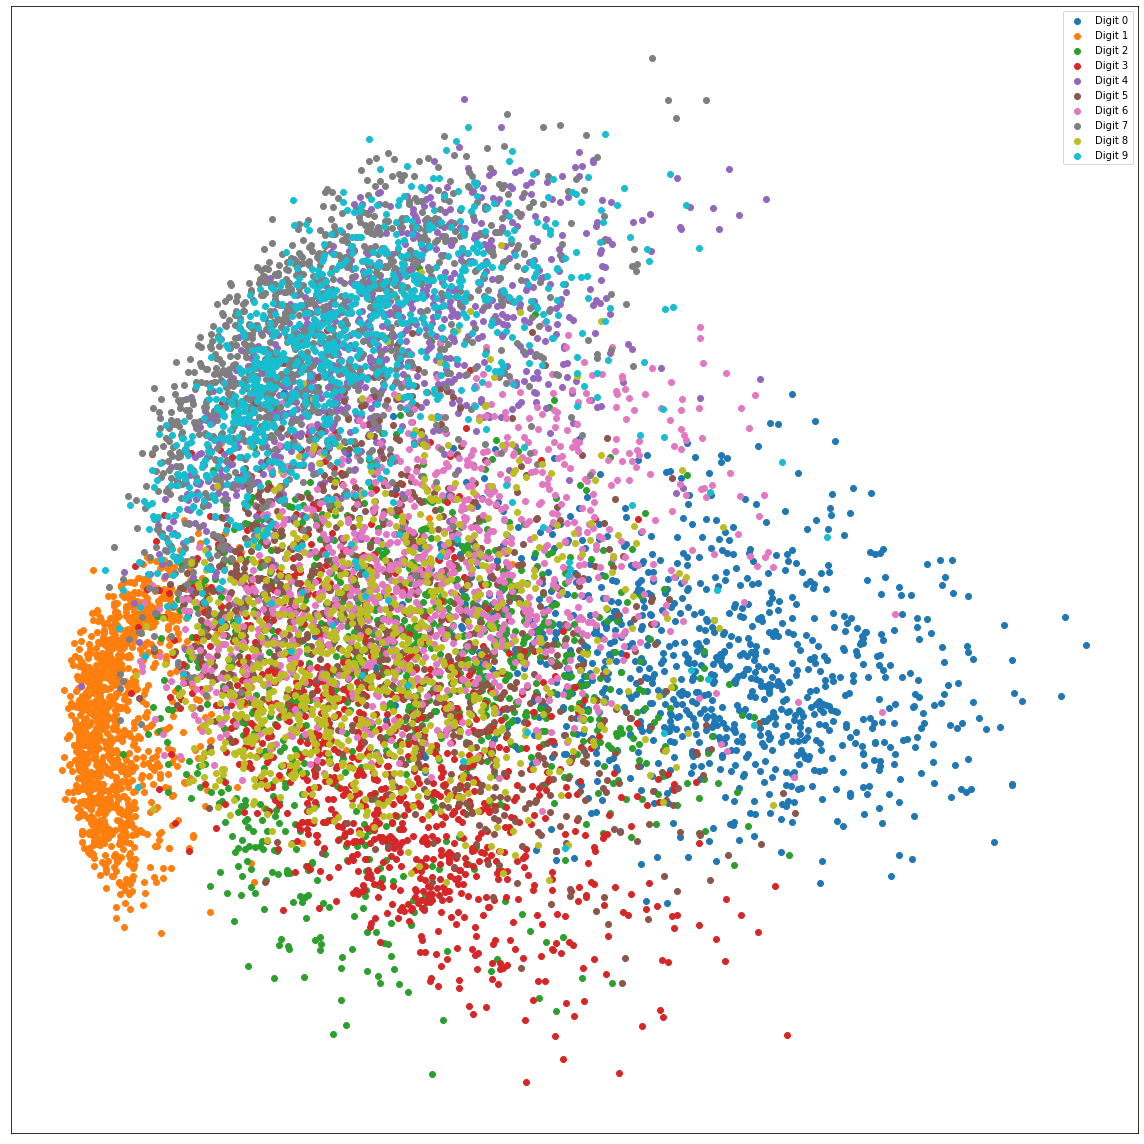

In [ ]:
plot_2d_mnist_scatter(mnist_small_embedded_pca, mnist_images_labels_small)

In [ ]:
kernel_pca = KernelPCA(kernel ='cosine', n_components=2)
mnist_embedded_kernel_pca = kernel_pca.fit_transform(mnist_images_small)

### Projection of MNIST dataset (limited samples) into two principal components using Kernel PCA

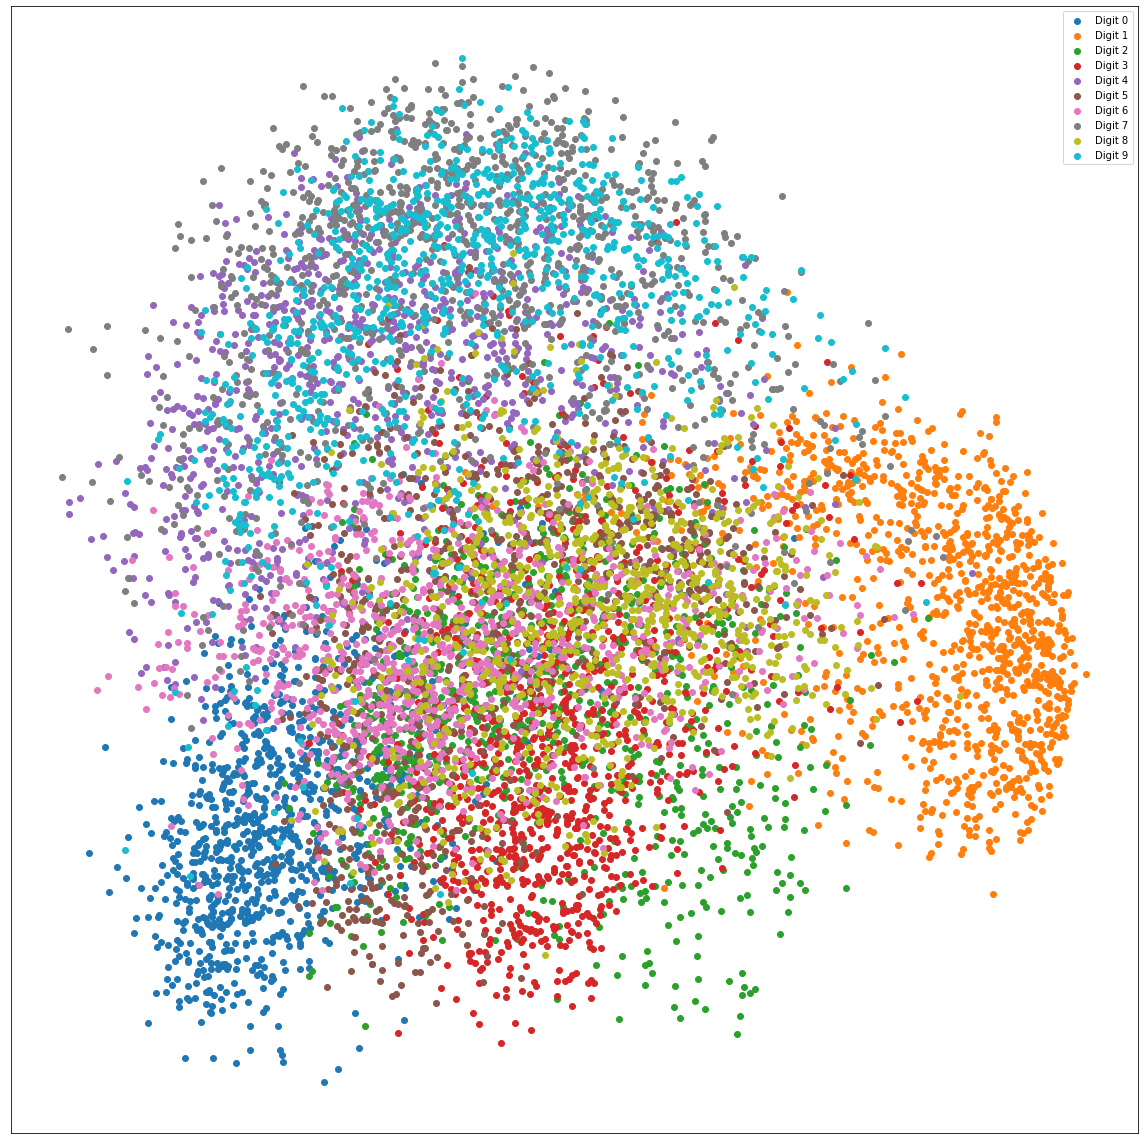

In [ ]:
plot_2d_mnist_scatter(mnist_embedded_kernel_pca, mnist_images_labels_small)

### Examine Variance based on MNIST dataset (samples not shrinked)

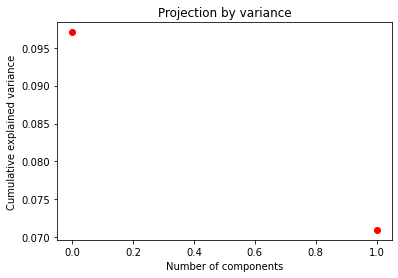

Principal Component 1 explains 9.704664359386555% of total variance.
Principal Component 2 explains 7.095924053578441% of total variance.
Dimensionality reducion to 2 Principal Components leaves 16.800588412964995% of total variance of shrinked dataset.


In [ ]:
mnist_variance_pca = pca.explained_variance_ratio_

plt.title("Projection by variance")
plt.plot(mnist_variance_pca, 'ro')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

print(f"Principal Component 1 explains {mnist_variance_pca[0] * 100}% of total variance.")
print(f"Principal Component 2 explains {mnist_variance_pca[1] * 100}% of total variance.")
print(f"Dimensionality reducion to {len(mnist_variance_pca)} Principal Components "
      f"leaves {sum(mnist_variance_pca) * 100}% of total variance of shrinked dataset.")

### Optimal MNIST dataset dimensionality

In [ ]:
pca_no_dim_reduction = PCA()
mnist_transformed = pca_no_dim_reduction.fit_transform(mnist_images)

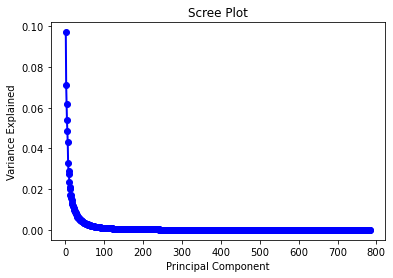

In [ ]:
PC_values = np.arange(pca_no_dim_reduction.n_components_) + 1
plt.plot(PC_values, pca_no_dim_reduction.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
sum(pca_no_dim_reduction.explained_variance_ratio_[0:331])
print(f"331 Principal Componetns explains 99% of total variation fo MNIST images dataset.")

sum(pca_no_dim_reduction.explained_variance_ratio_[0:154])
print(f"154 Principal Componetns explains 95% of total variation fo MNIST images dataset.")

sum(pca_no_dim_reduction.explained_variance_ratio_[0:87])
print(f"87 Principal Componetns explains 90% of total variation fo MNIST images dataset.")

sum(pca_no_dim_reduction.explained_variance_ratio_[0:59])
print(f"59 Principal Componetns explains 85% of total variation fo MNIST images dataset.")

331 Principal Componetns explains 99% of total variation fo MNIST images dataset.
154 Principal Componetns explains 95% of total variation fo MNIST images dataset.
87 Principal Componetns explains 90% of total variation fo MNIST images dataset.
59 Principal Componetns explains 85% of total variation fo MNIST images dataset.


Scree plot can be used in the process of searching for the optimal dimensionality of data. The key is a compromise between the retained variance and the number of reduced dimensions.

### Visualize MNIST digits after Inversed PCA - limited dataset to 10000 samples

In [ ]:
def visualize_digits_from_inversed_pca(n_components, context):
    pca_percent_variance = PCA(n_components)
    mnist_PC = pca_percent_variance.fit_transform(context)
    inversed_mnist_PC = pca_percent_variance.inverse_transform(mnist_PC)

    digits = np.reshape(inversed_mnist_PC[:12*24], newshape=(12, 24, 28, 28))
    img = tiles(digits)
    print(f"Inversed transformation for PCA - {n_components}")
    plt.matshow(img, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()

Inversed transformation for PCA - 331


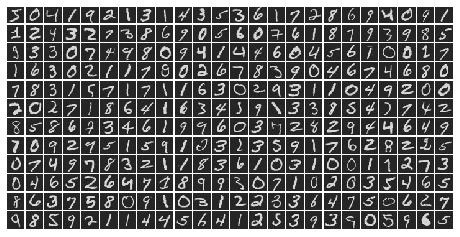

Inversed transformation for PCA - 154


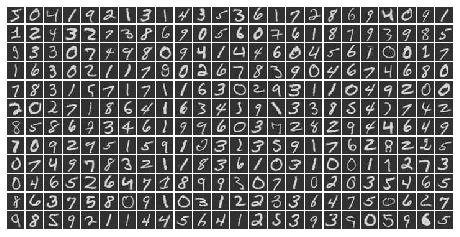

Inversed transformation for PCA - 87


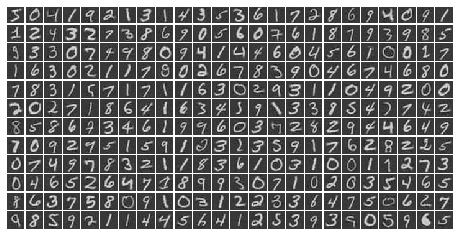

Inversed transformation for PCA - 59


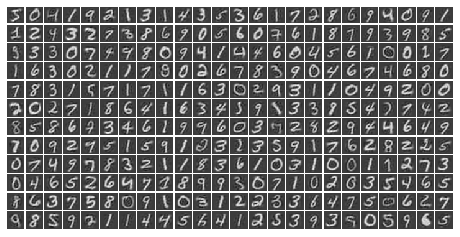

In [ ]:
visualize_digits_from_inversed_pca(331, mnist_images_small)
visualize_digits_from_inversed_pca(154, mnist_images_small)
visualize_digits_from_inversed_pca(87, mnist_images_small)
visualize_digits_from_inversed_pca(59, mnist_images_small)

### Visualize MNIST digits after Inversed Kernel PCA - limited dataset to 10000 samples

In [ ]:
def visualize_digits_from_inversed_kernel_pca(n_components, context):
    pca_percent_variance = KernelPCA(n_components, fit_inverse_transform=True)
    mnist_PC = pca_percent_variance.fit_transform(context)
    inversed_mnist_PC = pca_percent_variance.inverse_transform(mnist_PC)

    digits = np.reshape(inversed_mnist_PC[:12*24], newshape=(12, 24, 28, 28))
    img = tiles(digits)
    print(f"Inversed transformation for Kernel PCA - {n_components}")
    plt.matshow(img, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()

Inversed transformation for Kernel PCA - 331


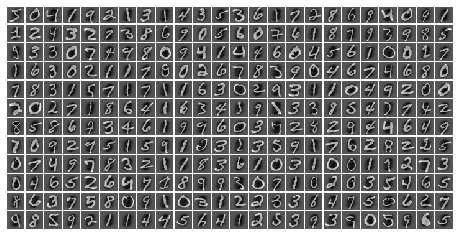

In [ ]:
visualize_digits_from_inversed_kernel_pca(331, mnist_images_small)

Inversed transformation for Kernel PCA - 154


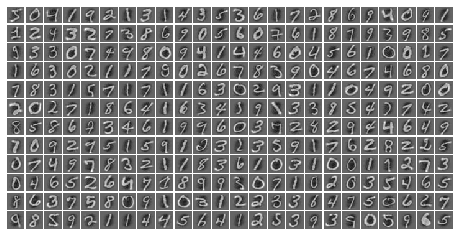

In [ ]:
visualize_digits_from_inversed_kernel_pca(154, mnist_images_small)

Inversed transformation for Kernel PCA - 87


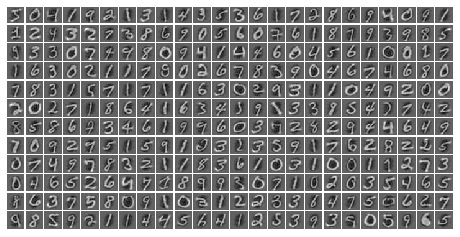

In [ ]:
visualize_digits_from_inversed_kernel_pca(87, mnist_images_small)

Inversed transformation for Kernel PCA - 59


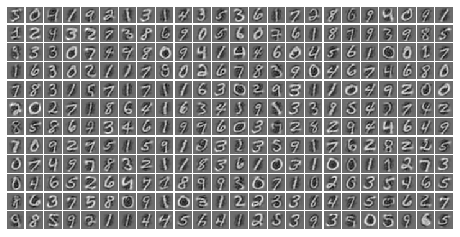

In [ ]:
visualize_digits_from_inversed_kernel_pca(59, mnist_images_small)

### Conclusions:
<p style='text-align: justify;'>
The dimensionality of the MNIST dataset was reduced using the PCA technique to visualize it in a two-dimensional space. Thanks to this, it is possible to analyze the selected clusters in terms of similarities or differences. For example, the representations of digits 5 and 9 occupy almost the same place in the two-dimensional - it is natural that a sloppyly written 5 may resemble 9. In this context, dimensionality reduction can be used to pre-analyze the data set in terms of the dependencies and how well the data clusters representing the individual digits can be separated.
    
With inversed transformation, the quality and details of the digits in a MNIST dataset after both PCA and Kernel PCA can be verified - more detalis are retained using PCA than kernal PCA with applied 'cosine' kernel - principal components from PCA explained more variancy from the original dataset. It turns out that not every nonlinear separation method will be good for any nonlinear data set. The key is therefore the appropriate selection of parameters as well as the selection of an appropriate method.
</p>